<a href="https://colab.research.google.com/github/BogdanMantescu/llm/blob/main/sumar_creativ_melodii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q --upgrade bitsandbytes accelerate

from IPython.display import Markdown, display, update_display
from openai import OpenAI
from google.colab import drive
from huggingface_hub import login
from google.colab import userdata
from transformers import AutoTokenizer, AutoModelForCausalLM, TextStreamer, BitsAndBytesConfig, pipeline
import torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 MB 16.4 MB/s eta 0:00:00


In [2]:
hf_token = userdata.get('HF_TOKEN')
login(hf_token, add_to_git_credential=True)

In [ ]:
audio_filename = 'alternosfera.mp3'
audio_file = open(audio_filename, "rb")

pipe = pipeline(
    "automatic-speech-recognition",
    model="openai/whisper-large-v3-turbo",
    dtype=torch.float16,
    device='cuda',
    return_timestamps=True,
    language="ro"
)

result = pipe(audio_filename)
transcription = result["text"]
display(Markdown(transcription))

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.62G [00:00<?, ?B/s]

generation_config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

normalizer.json: 0.00B [00:00, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/340 [00:00<?, ?B/s]

Device set to use cuda


 MULȚUMIT PENTRU VIZIONARE! MULȚUMIT PENTRU VIZIONARE! MULȚUMIT PENTRU VIZIONARE! Muzica Latră arterele, cresc artierele Fatsade, întumori Văduți clădirile, își caută mirele Mirese, grintre nori Piranica glanțele, trecă-n bulanțele Pe stradă, ricoșet, mi-a scos toate hainele Stors toate tainele, orașul proxenet Mai lovește, mai bate, plin aretnic Doar o curse, o noapte, plin agonii Sufocată mai fuge, inima gând Desplătește mai soarte, în armonii În mi-a trite romanze, spre a folii, guarde trase maestrite, i-diva-n-i-a Pânica crimele, iau medicinele, port îmbra, neahamau, oraș fără spirite, nebun fără limite, năprasnic, litoral, un fiu vitrec de tântoar, a murit sau amar. Pe-o cruce, dus de vău Și-a scos toate hainele Stors toate tainele Le sunt pustiu în mău Mai la ovește, mai bate Prin aretnic Doar o curse, o noapte Prin agolii Sufocată, mai fuge Inima mea Te spletește mai soarte în armonic Împietrite romanțe spre afonii Toar de trase mai strică inima nea Mai lovește, mai bate, în arătnic Doar o curse, o noapte, prin agorii Sufocată, mai fuge, inima mea Despre tește-mă soarte în armonic Împietrite romanțe spre afogic Foarte trasă mai strică inima nea MULȚUMIT PENTRU VIZIONARE! Să ne vedem la următoarea mea rețetă.

MULȚUMIT PENTRU VIZIONARE! MULȚUMIT PENTRU VIZIONARE! MULȚUMIT PENTRU VIZIONARE! Muzica Latră arterele, cresc artierele Fatsade, întumori Văduți clădirile, își caută mirele Mirese, grintre nori Piranica glanțele, trecă-n bulanțele Pe stradă, ricoșet, mi-a scos toate hainele Stors toate tainele, orașul proxenet Mai lovește, mai bate, plin aretnic Doar o curse, o noapte, plin agonii Sufocată mai fuge, inima gând Desplătește mai soarte, în armonii În mi-a trite romanze, spre a folii, guarde trase maestrite, i-diva-n-i-a Pânica crimele, iau medicinele, port îmbra, neahamau, oraș fără spirite, nebun fără limite, năprasnic, litoral, un fiu vitrec de tântoar, a murit sau amar. Pe-o cruce, dus de vău Și-a scos toate hainele Stors toate tainele Le sunt pustiu în mău Mai la ovește, mai bate Prin aretnic Doar o curse, o noapte Prin agolii Sufocată, mai fuge Inima mea Te spletește mai soarte în armonic Împietrite romanțe spre afonii Toar de trase mai strică inima nea Mai lovește, mai bate, în arătnic Doar o curse, o noapte, prin agorii Sufocată, mai fuge, inima mea Despre tește-mă soarte în armonic Împietrite romanțe spre afogic Foarte trasă mai strică inima nea MULȚUMIT PENTRU VIZIONARE! Să ne vedem la următoarea mea rețetă.

# **Extrage ideile principale intr-un mod creativ**

In [ ]:

LLAMA = "meta-llama/Llama-3.2-3B-Instruct"

system_message = """
Tu vei face un sumar al textului cantecului, cu puncte cheie si idei desprinse din el in format markdown
"""

user_prompt = f"""
Mai jos ai un text dintr-un cantec.
Scrie un sumar de maxim 20 de cuvinte in format markdown fara blocuri de cod, in care sa incerci sa identifici in mod creativ
despre ce este vorba in cantec.

Transcription:
{transcription}
"""

messages = [
    {"role": "system", "content": system_message},
    {"role": "user", "content": user_prompt}
  ]

quant_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_compute_dtype=torch.bfloat16,
    bnb_4bit_quant_type="nf4"
)

tokenizer = AutoTokenizer.from_pretrained(LLAMA)
tokenizer.pad_token = tokenizer.eos_token
inputs = tokenizer.apply_chat_template(messages, return_tensors="pt").to("cuda")
streamer = TextStreamer(tokenizer)
model = AutoModelForCausalLM.from_pretrained(LLAMA, device_map="auto", quantization_config=quant_config)
outputs = model.generate(inputs, max_new_tokens=2000, streamer=streamer)

response = tokenizer.decode(outputs[0])
display(Markdown(response))

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 07 Jan 2026

Tu vei face un sumar al textului cantecului, cu puncte cheie si idei desprinse din el in format markdown<|eot_id|><|start_header_id|>user<|end_header_id|>

Mai jos ai un text dintr-un cantec.
Scrie un sumar de maxim 20 de cuvinte in format markdown fara blocuri de cod, in care sa incerci sa identifici in mod creativ
despre ce este vorba in cantec.

Transcription:
 MULȚUMIT PENTRU VIZIONARE! MULȚUMIT PENTRU VIZIONARE! MULȚUMIT PENTRU VIZIONARE! Muzica Latră arterele, cresc artierele Fatsade, întumori Văduți clădirile, își caută mirele Mirese, grintre nori Piranica glanțele, trecă-n bulanțele Pe stradă, ricoșet, mi-a scos toate hainele Stors toate tainele, orașul proxenet Mai lovește, mai bate, plin aretnic Doar o curse, o noapte, plin agonii Sufocată mai fuge, inima gând Desplătește mai soarte, în armonii În mi-a trite romanze, spre a folii, guarde trase maestrite,

<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 07 Jan 2026

Tu vei face un sumar al textului cantecului, cu puncte cheie si idei desprinse din el in format markdown<|eot_id|><|start_header_id|>user<|end_header_id|>

Mai jos ai un text dintr-un cantec.
Scrie un sumar de maxim 20 de cuvinte in format markdown fara blocuri de cod, in care sa incerci sa identifici in mod creativ
despre ce este vorba in cantec.

Transcription:
 MULȚUMIT PENTRU VIZIONARE! MULȚUMIT PENTRU VIZIONARE! MULȚUMIT PENTRU VIZIONARE! Muzica Latră arterele, cresc artierele Fatsade, întumori Văduți clădirile, își caută mirele Mirese, grintre nori Piranica glanțele, trecă-n bulanțele Pe stradă, ricoșet, mi-a scos toate hainele Stors toate tainele, orașul proxenet Mai lovește, mai bate, plin aretnic Doar o curse, o noapte, plin agonii Sufocată mai fuge, inima gând Desplătește mai soarte, în armonii În mi-a trite romanze, spre a folii, guarde trase maestrite, i-diva-n-i-a Pânica crimele, iau medicinele, port îmbra, neahamau, oraș fără spirite, nebun fără limite, năprasnic, litoral, un fiu vitrec de tântoar, a murit sau amar. Pe-o cruce, dus de vău Și-a scos toate hainele Stors toate tainele Le sunt pustiu în mău Mai la ovește, mai bate Prin aretnic Doar o curse, o noapte Prin agolii Sufocată, mai fuge Inima mea Te spletește mai soarte în armonic Împietrite romanțe spre afonii Toar de trase mai strică inima nea Mai lovește, mai bate, în arătnic Doar o curse, o noapte, prin agorii Sufocată, mai fuge, inima mea Despre tește-mă soarte în armonic Împietrite romanțe spre afogic Foarte trasă mai strică inima nea MULȚUMIT PENTRU VIZIONARE! Să ne vedem la următoarea mea rețetă.<|eot_id|><|start_header_id|>assistant<|end_header_id|>

# Sumar Cantec "MULȚUMIT PENTRU VIZIONARE!"
Cantecul prezintă o luptă internă și emoțională a personajului, care se confruntă cu agitația, frică și suferința. Personajul este "închis" în elinile sale și se bate cu mintea, fiind "sufocat" de emoțiile și gândurile sale. Cantecul exprimă ideea de a lupta cu sine însuși și de a căpata libertate de gând și de emoții.<|eot_id|>

In [ ]:
sumar = tokenizer.decode(outputs[0])

Sumar al cantecului

Cantecul prezintă o luptă internă a unei persoane care se confruntă cu suferințe emoționale și psihologice. El se simte sufocat și învințat de agitația și de agresivitatea în jurului său, iar toate hainele și tainele sale sunt "scos" de viață. Personajul își căută mirele, dar este pierdut într-un oraș "fără spirite" și "fără limite".

El se simte învințat de agresivitatea și de agitația în jur, iar inima sa este "trasă" și "stricată". Cantecul prezintă o luptă pentru a găsi un echilibru și a se simți în armonie cu sine și cu lumea.

Puncte cheie:

Luptă internă și suferințe emoționale
Agitație și agresivitate în jurul
Pierderea într-un oraș "fără spirite" și "fără limite"
Luptă pentru echilibru și armonie cu sine și cu lumea
Idei desprinse din el:

Problemele de sănătate mintală și emoțională
Aventura și explorarea într-un nou mediu
Lupta pentru a găsi un echilibru și a se simți în armonie cu sine și cu lumea<|eot_id|>

**Generare imagini**

In [ ]:
from diffusers import DiffusionPipeline

# switch to "mps" for apple devices
pipe = DiffusionPipeline.from_pretrained("ImageInception/ArtifyAI-v1.1", dtype=torch.bfloat16, device_map="cuda")

image = pipe(sumar).images[0]

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


model_index.json:   0%|          | 0.00/668 [00:00<?, ?B/s]

Fetching 21 files:   0%|          | 0/21 [00:00<?, ?it/s]

ArtifyAI_model/unet/diffusion_pytorch_mo(…):   0%|          | 0.00/1.72G [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

ArtifyAI_model/text_encoder/model.safete(…):   0%|          | 0.00/246M [00:00<?, ?B/s]

ArtifyAI_model/vae/diffusion_pytorch_mod(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/780 [00:00<?, ?B/s]

pipeline.py:   0%|          | 0.00/876 [00:00<?, ?B/s]

t5_model/model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/374 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/708 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/585 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/903 [00:00<?, ?B/s]

Keyword arguments {'dtype': torch.bfloat16} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (1389 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['inse din el in format markdown <| eot _ id |><| start _ header _ id |> user <| end _ header _ id |> mai jos ai un text dintr - un cantec. scrie un sumar in format markdown fara blocuri de cod, in care sa incerci sa identifici in mod creativ despre ce este vorba in cantec. transcription : mulțumit pentru vizionare! mulțumit pentru vizionare! mulțumit pentru vizionare! muzica latră arterele, cresc artierele fatsade, întumori văduți clădirile, își caută mirele mirese, grintre nori piranica glanțele, trecă - n bulanțele pe stradă, ricoșet, mi - a scos toate hainele stors toate tainele, orașul proxenet mai lovește, mai bate, plin aretnic doar o curse, o noapte, plin agonii sufocată mai fuge, inima gând desplă

  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['a. personajul este " închis " în elinile sale și se bate cu mintea, fiind " sufocat " de emoțiile și gândurile sale. cantecul exprimă ideea de a lupta cu sine însuși și de a căpata libertate de gând și de emoții.<| eot _ id |>']


  0%|          | 0/50 [00:00<?, ?it/s]

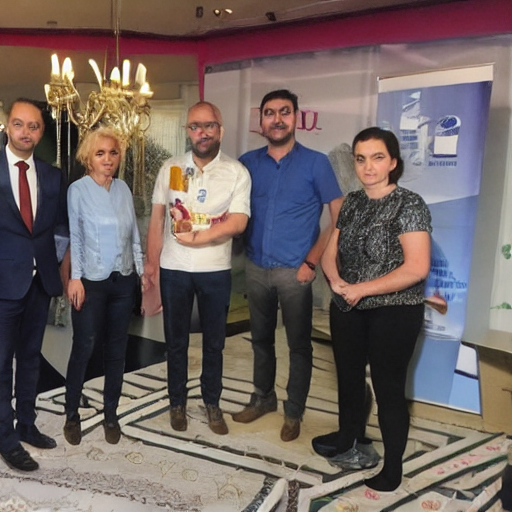

In [ ]:
response_sumar = sumar.split('assistant<|end_header_id|>')[1]
image = pipe(response_sumar).images[0]
display(image)

In [ ]:
response_sumar

'\n\n**Sumar al cantecului**\n\nCantecul prezintă o luptă internă a unei persoane care se confruntă cu suferințe emoționale și psihologice. El se simte sufocat și învințat de agitația și de agresivitatea în jurului său, iar toate hainele și tainele sale sunt "scos" de viață. Personajul își căută mirele, dar este pierdut într-un oraș "fără spirite" și "fără limite".\n\nEl se simte învințat de agresivitatea și de agitația în jur, iar inima sa este "trasă" și "stricată". Cantecul prezintă o luptă pentru a găsi un echilibru și a se simți în armonie cu sine și cu lumea.\n\n**Puncte cheie:**\n\n*   Luptă internă și suferințe emoționale\n*   Agitație și agresivitate în jurul\n*   Pierderea într-un oraș "fără spirite" și "fără limite"\n*   Luptă pentru echilibru și armonie cu sine și cu lumea\n\n**Idei desprinse din el:**\n\n*   Problemele de sănătate mintală și emoțională\n*   Aventura și explorarea într-un nou mediu\n*   Lupta pentru a găsi un echilibru și a se simți în armonie cu sine și cu

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

text_encoder_2/model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/5.14G [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

vae_1_0/diffusion_pytorch_model.fp16.saf(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model_index.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/4.52G [00:00<?, ?B/s]

vae_1_0/diffusion_pytorch_model.fp16.saf(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (485 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['at de agitația și de agresivitatea în jurului său, iar toate hainele și tainele sale sunt " scos " de viață. personajul își căută mirele, dar este pierdut într - un oraș " fără spirite " și " fără limite ". el se simte învințat de agresivitatea și de agitația în jur, iar inima sa este " trasă " și " stricată ". cantecul prezintă o luptă pentru a găsi un echilibru și a se simți în armonie cu sine și cu lumea. ** puncte cheie :** * luptă internă și suferințe emoționale * agitație și agresivitate în jurul * pierderea într - un oraș " fără spirite " și " fără limite " * luptă pentru echilibru și armonie cu sine și cu lumea ** idei desprinse din el :** * problemele de sănătate mintală și emoțională * aventura 

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/diffusers/pipelines/stable_diffusion_xl/pipeline_stable_diffusion_xl_img2img.py:896: FutureWarning: `upcast_vae` is deprecated and will be removed in version 1.0.0. `upcast_vae` is deprecated. Please use `pipe.vae.to(torch.float32)`. For more details, please refer to: https://github.com/huggingface/diffusers/pull/12619#issue-3606633695.
  deprecate(


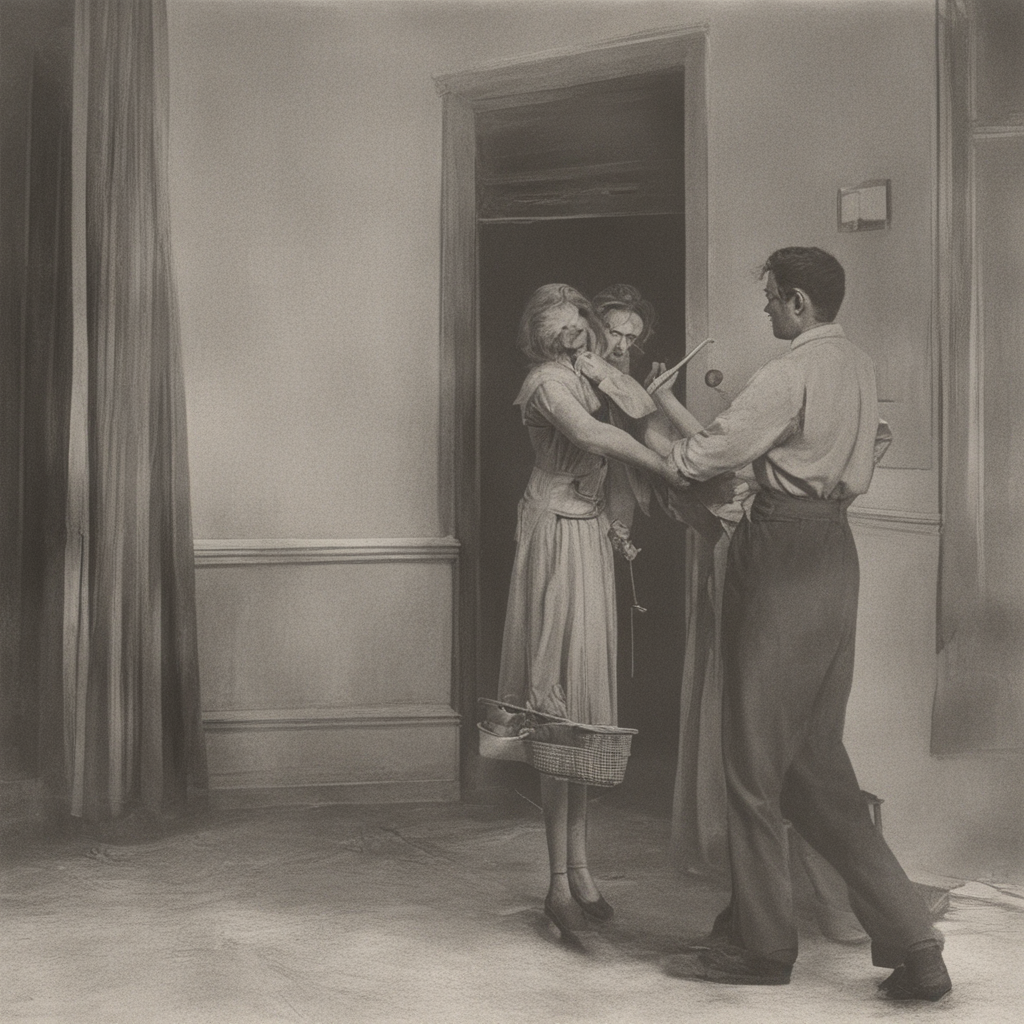

In [1]:
#import IPython
#IPython.Application.instance().kernel.do_shutdown(True)

!pip install -q --upgrade transformers==4.56.2

from IPython.display import display
from diffusers import DiffusionPipeline
import torch


response_sumar = f"""

**Sumar al cantecului**

Cantecul prezintă o luptă internă a unei persoane care se confruntă cu suferințe emoționale și psihologice. El se simte sufocat și învințat de agitația și de agresivitatea în jurului său, iar toate hainele și tainele sale sunt "scos" de viață. Personajul își căută mirele, dar este pierdut într-un oraș "fără spirite" și "fără limite".

El se simte învințat de agresivitatea și de agitația în jur, iar inima sa este "trasă" și "stricată". Cantecul prezintă o luptă pentru a găsi un echilibru și a se simți în armonie cu sine și cu lumea.

**Puncte cheie:**

*   Luptă internă și suferințe emoționale
*   Agitație și agresivitate în jurul
*   Pierderea într-un oraș "fără spirite" și "fără limite"
*   Luptă pentru echilibru și armonie cu sine și cu lumea

**Idei desprinse din el:**

*   Problemele de sănătate mintală și emoțională
*   Aventura și explorarea într-un nou mediu
*   Lupta pentru a găsi un echilibru și a se simți în armonie cu sine și cu lumea<|eot_id|>
"""

system_message = f"""
Esti un pictor creator de imagini, care stie creeze imagini artistice dintr-un sumar al unui cantec.
Trebuie sa pui in imagine conceptele si obiectele importante din sumar
"""

user_prompt = f"""
Mai jos ai un sumar al unui cantec
Creaza o pictura, imagine artistica in care sa se regaseasca toate elementele din sumar

Transcription:
{response_sumar}
"""

messages = [
    {"role": "system", "content": system_message},
    {"role": "user", "content": user_prompt}
  ]

base = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True)
base.to("cuda")
refiner = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-refiner-1.0", text_encoder_2=base.text_encoder_2, vae=base.vae, torch_dtype=torch.float16, use_safetensors=True, variant="fp16",)
refiner.to("cuda")

# Define how many steps and what % of steps to be run on each experts (80/20) here
n_steps = 40
high_noise_frac = 0.8

prompt = "A class of data scientists learning AI engineering in a vibrant high-energy pop-art style"

# run both experts
image = base(
    prompt=response_sumar,
    num_inference_steps=n_steps,
    denoising_end=high_noise_frac,
    output_type="latent",
).images

image = refiner(
    prompt=prompt,
    num_inference_steps=n_steps,
    denoising_start=high_noise_frac,
    image=image,
).images[0]

display(image)



